In [363]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import math
import csv
from itertools import izip
from sklearn.metrics import mean_squared_error

In [364]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [365]:
# load the dataset
dataframe = pandas.read_csv('prices2.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [367]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(191, 95)


In [368]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        tmp1 = dataset[i:(i+look_back),0] 
        dataX.append(tmp1)
        tmp2 = dataset[i + look_back,0] 
        dataY.append(tmp2)
    return numpy.array(dataX), numpy.array(dataY)

In [369]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [370]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=10, verbose=2)

Epoch 1/200
1s - loss: 374.5014
Epoch 2/200
0s - loss: 136.2899
Epoch 3/200
0s - loss: 33.4572
Epoch 4/200
0s - loss: 5.5749
Epoch 5/200
0s - loss: 2.2019
Epoch 6/200
0s - loss: 2.3033
Epoch 7/200
0s - loss: 2.2474
Epoch 8/200
0s - loss: 2.2260
Epoch 9/200
0s - loss: 2.2415
Epoch 10/200
0s - loss: 2.2147
Epoch 11/200
0s - loss: 2.2076
Epoch 12/200
0s - loss: 2.2085
Epoch 13/200
0s - loss: 2.2052
Epoch 14/200
0s - loss: 2.1884
Epoch 15/200
0s - loss: 2.1793
Epoch 16/200
0s - loss: 2.1724
Epoch 17/200
0s - loss: 2.1718
Epoch 18/200
0s - loss: 2.1683
Epoch 19/200
0s - loss: 2.1535
Epoch 20/200
0s - loss: 2.1442
Epoch 21/200
0s - loss: 2.1368
Epoch 22/200
0s - loss: 2.1265
Epoch 23/200
0s - loss: 2.1217
Epoch 24/200
0s - loss: 2.1195
Epoch 25/200
0s - loss: 2.1052
Epoch 26/200
0s - loss: 2.1220
Epoch 27/200
0s - loss: 2.0837
Epoch 28/200
0s - loss: 2.0806
Epoch 29/200
0s - loss: 2.0834
Epoch 30/200
0s - loss: 2.0637
Epoch 31/200
0s - loss: 2.0628
Epoch 32/200
0s - loss: 2.0568
Epoch 33/200

In [371]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f RMSE' % (math.sqrt(trainScore)))
#testScore = model.evaluate(testX, testY, verbose=0)
#print('Test Score: %.2f RMSE' % (math.sqrt(testScore)))

Train Score: 1.11 RMSE


Test Score: 1.32 RMSE


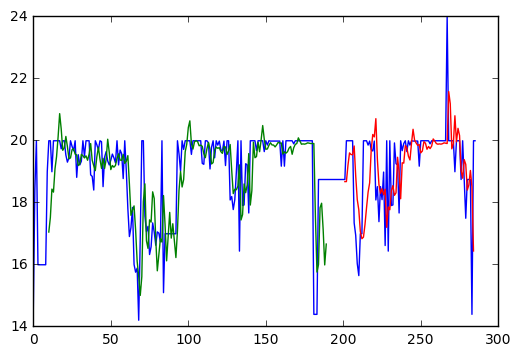

In [372]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=10)
testPredict = model.predict(testX, batch_size=10)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [350]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        tmp1 = dataset[i:(i+look_back)] 
        dataX.append(tmp1)
        tmp2 = dataset[i + look_back] 
        dataY.append(tmp2)
    return numpy.array(dataX), numpy.array(dataY)


print len(testPredict), len(testX)
tmpArr = test
for i in xrange(10):
    tmpArr = np.append(tmpArr, testPredict[-1])
    #print type(tmpArr), tmpArr
    testX, testY = get_data(tmpArr, look_back)
    testPredict = model.predict(testX)


#print len(testPredict)

with open("train_predict.csv", 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(testY, testPredict))

84 84


180